In [5]:
!pip install python-dotenv
!pip install openai
!pip install langchain
!pip install pypdf
!pip install tiktoken
!pip install chromadb
!pip install lark
!pip install docarray
!pip install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.3/418.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 65.4 MB/s 

## FOR GOOGLE COLLAB USERS ONLY: Mount Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
pdfpath='/content/drive/My Drive/14-Teaching/JoSSIS/pdfs/'

In [2]:
vectorstore_path='/content/drive/My Drive/14-Teaching/JoSSIS/docs/'

## OpenAI Key

In [3]:
import os
os.environ['OPENAI_API_KEY'] = 'sk-'

In [8]:
import os
import openai
from dotenv import load_dotenv

try:
    # Check if OPENAI_API_KEY is already set and has 51 characters
    if 'OPENAI_API_KEY' in os.environ:
        if len(os.environ['OPENAI_API_KEY']) == 51:
            openai.api_key = os.environ['OPENAI_API_KEY']
            print("Key successfully acquired.")
        else:
            print(f"Key length is wrong, only {len(os.environ['OPENAI_API_KEY'])} characters")
            print("Searching for \"mykey\" file")
            # Load environment variables from "mykey" file
            load_status = load_dotenv("mykey", override=True)

            # Check if the .env file was successfully loaded
            if not load_status:
                raise EnvironmentError("Could not load the \"mykey\" file")

            # Retrieve the API key from environment variables
            openai.api_key = os.environ['OPENAI_API_KEY']

            # Check if the loaded API key has 51 characters
            if len(openai.api_key) != 51:
                raise ValueError("The API key must contain 51 characters")
            print("Key successfully acquired.")
    else:
        print("OPENAI_API_KEY is not set in environment variables.")

except KeyError:
    print("Error: OPENAI_API_KEY not found in environment variables.")

except EnvironmentError as env_err:
    print(f"Environment Error: {env_err}")

except ValueError as val_err:
    print(f"Value Error: {val_err}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Key length is wrong, only 3 characters
Searching for "mykey" file
Key successfully acquired.


# Initalisation

Recall the overall workflow for retrieval augmented generation (RAG):

In [9]:
llm_name = "gpt-3.5-turbo"
print(llm_name)

gpt-3.5-turbo


In [10]:
persist_directory = 'docs/chroma/'
#persist_directory = vectorstore_path+'chroma/'
print(persist_directory)

docs/chroma/


# Overview
The overall workflow for retrieval augmented generation (RAG):

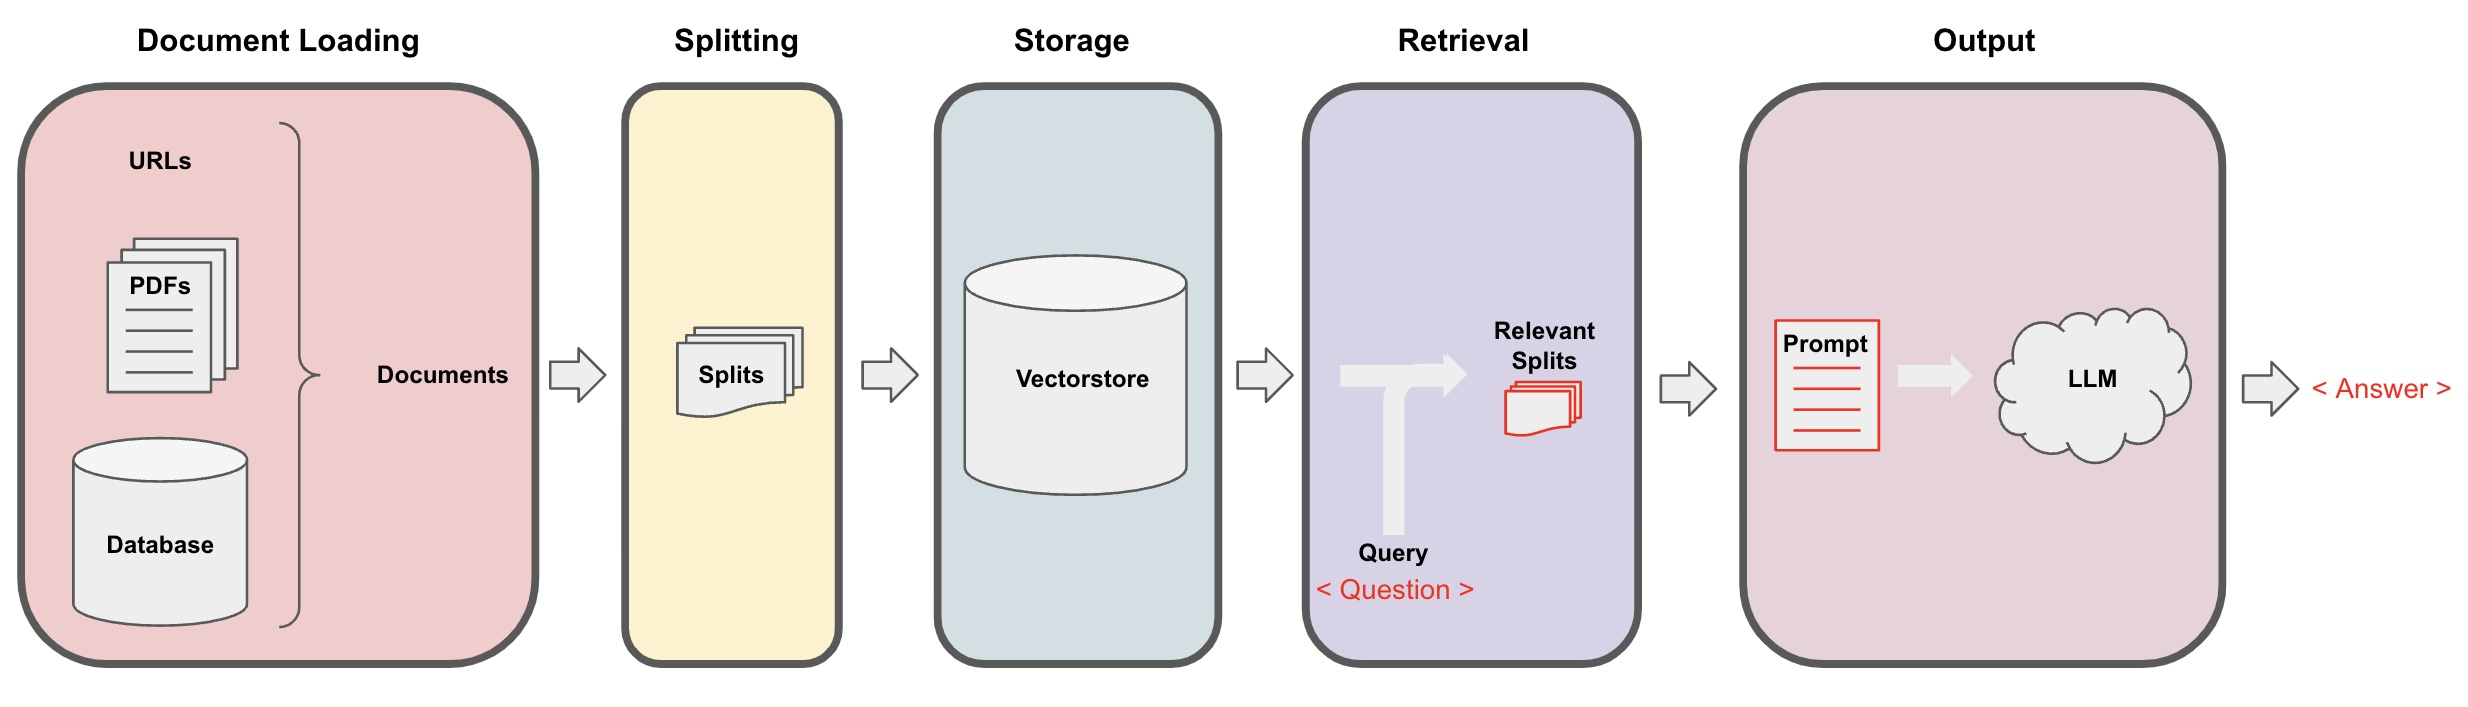

# Document Loading


In [15]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader(pdfpath+'spesenreglement.pdf')
pages = loader.load()

In [17]:
len(pages)

5

In [24]:
page = pages[0]
print(page.page_content[0:500])

Spesenreglement
vom 7. Dezember 2015
Der Universitätsrat erlässt
gestützt auf Art. 17 des Personalreglements vom 5. Mai 20141
folgendes Spesenreglement:
I. Allgemeiner Teil
Art. 1 Geltungsbereich
1 Dieses Reglement gilt für sämtliche Universitätsangehörigen2(inkl. Mitarbeitende in den 
Abteilungen, Instituten, Forschungsstellen und der ES-HSG).
2Die Bestimmungen dieses Erlasses gelten für die besonderen Arbeitsverhältnisse, insoweit 
der Anhang 1 keine besonderen Ansätze für diese Arbeitsverhält


In [22]:
page.metadata

{'source': '/content/drive/My Drive/14-Teaching/JoSSIS/pdfs/spesenreglement.pdf',
 'page': 0}

# Document Splitting

In [25]:
# This RecursiveCharacterTextSplitter splitter is the recommended one for generic text.
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [26]:
splits = text_splitter.split_documents(pages)

In [27]:
len(splits)

7

In [28]:
splits[0]

Document(page_content='Spesenreglement\nvom 7. Dezember 2015\nDer Universitätsrat erlässt\ngestützt auf Art. 17 des Personalreglements vom 5. Mai 20141\nfolgendes Spesenreglement:\nI. Allgemeiner Teil\nArt. 1 Geltungsbereich\n1 Dieses Reglement gilt für sämtliche Universitätsangehörigen2(inkl. Mitarbeitende in den \nAbteilungen, Instituten, Forschungsstellen und der ES-HSG).\n2Die Bestimmungen dieses Erlasses gelten für die besonderen Arbeitsverhältnisse, insoweit \nder Anhang 1 keine besonderen Ansätze für diese Arbeitsverhältnisse vorsieht.\n3Soweit dieses Reglement keine Regelung enthält, ist die kantonale Spesenregelung3\nanwendbar.\nArt. 2 Grundsatz\n1Spesen sind Ersatz für ausgewiesene arbeitsbedingte Auslagen. Als Spesen gelten \nAuslagen für Verpflegung, Unterkunft, Geschäftsreisen und andere Auslagen, welche sich aufgrund dienstlicher Verpflichtungen ergeben.\n2Die Spesen werden nach den Ansätzen dieses Reglements vergütet, sofern sie tatsächlich \nentstanden und angemessen si

# Storage (Embeddings)


In [29]:
# Chroma is a database with embeddings.
from langchain.vectorstores import Chroma

In [30]:
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()

In [31]:
print(persist_directory)

docs/chroma/


In [32]:
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embedding,
    persist_directory=persist_directory
)

In [33]:
print(vectordb._collection.count())

7


In [34]:
vectordb.persist()

# Retrieval + Question Answering

In [35]:
# Wrapper around OpenAI large language models that use the Chat endpoint.
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model_name=llm_name, temperature=0)

In [36]:
# Prompt templates are pre-defined recipes for generating prompts for language models.
from langchain.prompts import PromptTemplate

# Build prompt
template = """Beantworten Sie die Frage am Ende des Textes anhand \
der folgenden Informationen. Wenn Sie die Antwort nicht wissen, sagen Sie einfach, \
dass Sie es nicht wissen, versuchen Sie nicht, eine Antwort zu erfinden. \
Verwenden Sie maximal drei Sätze. Fassen Sie die Antwort so kurz wie möglich. \
Sagen Sie immer "Danke für die Frage" am Ende der Antwort.
{context}
Frage: {question}
Hilfreiche Antwort:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)

In [37]:
from langchain.chains import RetrievalQA

In [38]:
# Run chain
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [41]:
question = "Wie hoch sind die Spesen für das Mittagessen?"
result = qa_chain({"query": question})
print(result["result"])

Die Spesen für das Mittagessen betragen CHF 25.00.
Danke für die Frage.
